<div dir="rtl">

# پرسپترون و رگرسیون لجستیک

در این نوتبوک، ما دو الگوریتم اساسی در یادگیری ماشین برای مسائل طبقه‌بندی (Classification) را بررسی و پیاده‌سازی خواهیم کرد: **پرسپترون** و **رگرسیون لجستیک**.

هدف این است که با مفاهیم تئوری و نحوه پیاده‌سازی عملی این دو الگوریتم آشنا شویم. این نوتبوک به گونه‌ای طراحی شده که برای افراد مبتدی که با مبانی نظری آشنا هستند اما تجربه عملی کمی دارند، مفید باشد.

</div>

<div dir="rtl">

## بخش اول: پرسپترون (Perceptron)

</div>

<div dir="rtl">

### مبانی نظری پرسپترون

پرسپترون یک الگوریتم طبقه‌بندی خطی دودویی (Binary) است. به این معنی که تلاش می‌کند تا با پیدا کردن یک خط (در فضای دو بعدی) یا یک ابرصفحه (در فضاهای با ابعاد بالاتر)، داده‌ها را به دو دسته مجزا تقسیم کند.

برای هر ورودی $\mathbf{x}$، خروجی پرسپترون (برچسب کلاس) با استفاده از فرمول زیر محاسبه می‌شود:
<div dir="ltr">

$$ y(\mathbf{x}) = f(\mathbf{w}^{\mathrm{T}}\mathbf{x} + b) $$

</div>

که در آن:
* $\mathbf{w}$ بردار وزن‌ها است.
* $b$ مقدار بایاس (bias) است.
* $f$ تابع فعال‌سازی پله‌ای (Step Function) است که به صورت زیر تعریف می‌شود:
<div dir="ltr">

$$ f(a) = \begin{cases} +1 & a \geq 0 \\ -1 & a < 0 \end{cases} $$

</div>

#### الگوریتم یادگیری

برای آموزش پرسپترون، از **قانون یادگیری پرسپترون** استفاده می‌کنیم. هدف، کمینه کردن خطای طبقه‌بندی است. برای هر نمونه داده که به اشتباه طبقه‌بندی شده، وزن‌ها و بایاس به صورت زیر به‌روزرسانی می‌شوند:

<div dir="ltr">

$$ \mathbf{w} \leftarrow \mathbf{w} + (t_n - y_n) \mathbf{x}_{n} $$
$$ b \leftarrow b + (t_n - y_n) $$

</div>

که در آن:
* $t_n$ برچسب واقعی و $y_n$ برچسب پیش‌بینی شده برای نمونه $n$ام است.

**نکته مهم:** الگوریتم پرسپترون تنها در صورتی همگرا می‌شود که داده‌ها **خطی تفکیک‌پذیر** باشند.

---

#### بحث کنید
* اگر داده‌ها خطی تفکیک‌پذیر نباشند، چه اتفاقی برای الگوریتم می‌افتد؟
* چرا به‌روزرسانی وزن‌ها فقط برای نمونه‌های اشتباه انجام می‌شود؟
* چرا در الگوریتم perceptron از نرخ یادگیری استفاده نمی‌کنیم یا بهتر بگویم، آن را همیشه عدد 1 می‌گذاریم؟

</div>

<div dir="rtl">

## پیاده‌سازی پرسپترون

</div>

In [582]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<div dir="rtl">

#### ۱. تولید و آماده‌سازی داده
ابتدا یک مجموعه داده ساده و خطی تفکیک‌پذیر با دو ویژگی تولید می‌کنیم.

</div>

In [583]:
# TODO: Load the data from "dataset1.csv" into a pandas DataFrame.
df = pd.read_csv(r"E:\دوره تابستانه\Practice\Classification\dataset1.csv")

# TODO: Display the first rows of the dataframe.
df.head(5)

,Feature 1,Feature 2,class
0,-0.839280,1.129900,A
1,1.118454,-0.437880,B
2,-1.535992,0.567154,A
3,1.424187,-0.974021,B
4,1.470044,-1.345918,B


In [584]:
# TODO: Separate features (X) and the target label (y).
y = df["class"].copy()
X = df.drop("class", axis=1).copy()
# TODO: Convert the categorical labels {'A', 'B'} to numerical labels {1, -1}.
for i, label in enumerate(y):
    if label == "A":
        y.iloc[i] = 1
    elif label == "B":
            y.iloc[i] = -1
y = y.astype(int)
#Another way
y_encoded = df["class"].copy()
y_encoded[y_encoded == "A"] = 1
y_encoded[y_encoded == "B"] = -1
y_encoded = y_encoded.astype(int)
#Another way
y_enc = df["class"].map({"A" : 1,
               "B" : -1})
y.equals(y_encoded) and y.equals(y_enc)


True

In [585]:
# TODO: complete the function. use numpy.random.shuffle on indices.
def train_test_split(X, y, test_size=0.2, random_state=1404):


    """
    Splits arrays or matrices into random train and test subsets.

    Args:
        X: The feature dataset.
        y: The target labels.
        test_size: The proportion of the dataset to include in the test split.
        random_state: Seed for the random number generator for reproducibility.

    Returns:
        X_train, X_test, y_train, y_test
    """
    
    np.random.seed(random_state)
    idx = np.random.permutation(len(X))
    X = np.array(X)
    y = np.array(y)
    shuffled_X = X[idx]
    shuffled_y = y[idx]
    test_number = int(len(shuffled_X) * test_size)
    # train_number = len(shuffled_X) - test_number
    X_test = shuffled_X[:test_number]
    X_train = shuffled_X[test_number:]
    y_test = shuffled_y[:test_number]
    y_train = shuffled_y[test_number:]
    
    return X_train, X_test, y_train, y_test


In [586]:
# TODO: Split the data into training (80%) and test (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y)

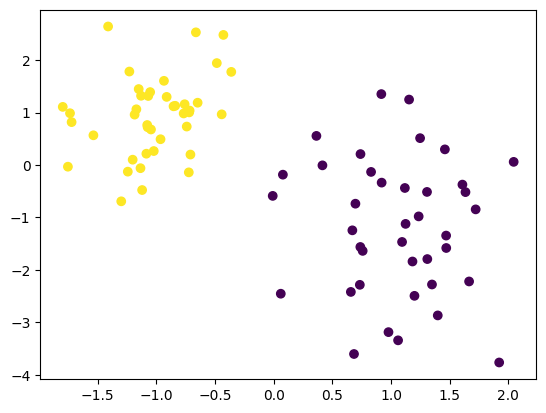

In [587]:
# TODO: Plot the training data to visualize the classes
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train);


<div dir="rtl">

#### ۲. پیاده‌سازی کلاس پرسپترون
در این بخش، کلاس پرسپترون را از ابتدا پیاده‌سازی می‌کنیم. دانشجویان باید متدهای `fit` و `predict` را کامل کنند.

اگر با مفهوم کلاس در پایتون آشنایی ندارید، می توانید از لینک های [Pyhton Documentation](https://docs.python.org/3/tutorial/classes.html) یا [GeeksforGeeks](https://www.geeksforgeeks.org/python/python-classes-and-objects/) یا [W3schools](https://www.w3schools.com/python/python_classes.asp) با آن آشنا شوید.
</div>

In [588]:
class Perceptron:
    """ 
    Perceptron classifier implementation.
    """
    def __init__(self, n_iters: int = 1):
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _activation_func(self, x: np.ndarray) -> np.ndarray:
        # Implement the step activation function.

        # x = x.astype(float)
        # x[x > 0] = 1
        # x[ x <= 0] = -1
        #__________________________

        return np.where(x > 0, 1, -1).astype(int)

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Train the Perceptron model using the input data.
        """
        self.weights = np.random.normal(0, 1, (X.shape[1], 1)).squeeze()
        self.bias = np.random.randn()
        for iter in range(self.n_iters):
            # compute weights and bias
            z = X @ self.weights + self.bias
            a = self._activation_func(z)
            for i , (y_pred, y_true) in enumerate(zip(a, y)):
                if y_pred != y_true:
                    self.weights += (y[i] - a[i]) * X[i]
                    self.bias += y[i] - a[i]
        return print("fitted")
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict class labels for new data.
        """
        z = X @ self.weights + self.bias
        a = self._activation_func(z)
        return a

<div dir="rtl">

#### ۳. آموزش و ارزیابی مدل

</div>

In [589]:
# TODO: Instantiate the Perceptron class and train the model using the training data.
model = Perceptron()
model.fit(X_train, y_train)
# TODO: Make predictions on the test data.
y_pred = model.predict(X_test)
# TODO: Implement the accuracy function.
def accuracy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return (y_true == y_pred).sum() / len(y_true)

# TODO: Calculate the accuracy on the test set and print it.
accuracy(y_test, y_pred)

fitted


np.float64(1.0)

<div dir="rtl">

#### ۴. رسم مرز تصمیم
مرز تصمیم خطی است که توسط معادله $\mathbf{w}^{\mathrm{T}}\mathbf{x} + b = 0$ تعریف می‌شود. این خط داده‌ها را به دو کلاس تقسیم می‌کند.

</div>

C:\Users\alien\AppData\Local\Temp\ipykernel_15780\817578745.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


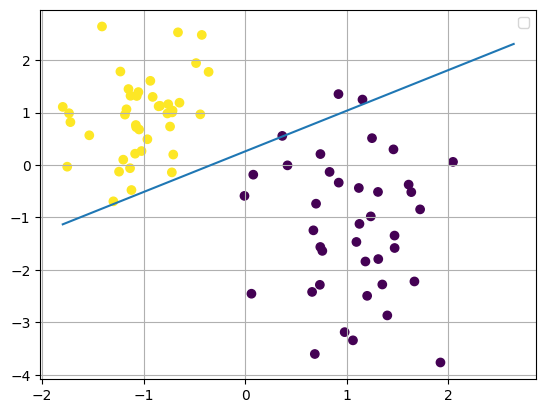

In [590]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X: np.ndarray, y: np.ndarray, model: Perceptron) -> None:
    """
    Plots the data points and the decision boundary of the trained model.
    Assumes binary classification and 2D feature input.
    """
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y)
    
    x_vals = np.linspace(X[:, 0].min(), X[:, 1].max(), 100)
    y_vals = -(x_vals * model.weights[1] + model.bias) / model.weights[0]
    plt.plot(x_vals, y_vals)
    plt.legend()
    plt.grid(True)
    plt.show()
plot_decision_boundary(X_train, y_train, model)

<div dir="rtl">

## بخش دوم: رگرسیون لجستیک (Logistic Regression)

</div>

<div dir="rtl">

### مبانی نظری رگرسیون لجستیک

رگرسیون لجستیک نیز یک الگوریتم طبقه‌بندی خطی است، اما برخلاف پرسپترون که یک خروجی قطعی (۱ یا -۱) دارد، احتمال تعلق یک نمونه به یک کلاس خاص را مدل می‌کند. این کار با استفاده از **تابع سیگموئید (Sigmoid)** انجام می‌شود:
<div dir="ltr">

$$ h_{\theta}(x) = \sigma(z) = \frac{1}{1+e^{-z}} $$
</div>

که در آن $z = \theta^T x$ است. خروجی تابع سیگموئید یک عدد بین ۰ و ۱ است که به عنوان احتمال کلاس ۱ در نظر گرفته می‌شود. ($P(y=1|x;\theta)$)

#### تابع هزینه (Cost Function)

برای آموزش مدل، از **تابع هزینه آنتروپی متقاطع (Cross-Entropy Loss)** یا **Log Loss** استفاده می‌کنیم. این تابع مدل را برای پیش‌بینی‌های اشتباه جریمه می‌کند:
<div dir="ltr">

$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\Big[y^{(i)}\log(h_{\theta}(x^{(i)})) + (1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))\Big] $$
</div>

هدف، پیدا کردن پارامترهای $\theta$ است که این تابع هزینه را کمینه کنند. این کار نیز با استفاده از **گرادیان کاهشی (Gradient Descent)** انجام می‌شود. مشتق تابع هزینه به صورت زیر است:
<div dir="ltr">

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} $$
</div>

---

#### بحث کنید
* تابع سیگموئید چه ویژگی‌هایی دارد که آن را برای مدل‌سازی احتمال مناسب می‌کند؟
* چرا از تابع هزینه آنتروپی متقاطع به جای خطای میانگین مربعات (MSE) که در رگرسیون خطی رایج است، استفاده می‌کنیم؟
* برخلاف پرسپترون، به‌روزرسانی وزن‌ها در رگرسیون لجستیک برای تمام نمونه‌ها (حتی آن‌هایی که درست طبقه‌بندی شده‌اند) انجام می‌شود. این موضوع چه تاثیری بر عملکرد مدل دارد؟

</div>

<div dir="rtl">

## پیاده‌سازی رگرسیون لجستیک

</div>

<div dir="rtl">

#### ۱. آماده‌سازی داده (مجموعه داده دیابت Pima)
در این بخش از مجموعه داده دیابت سرخپوستان پیما استفاده می‌کنیم. این یک مسئله طبقه‌بندی دودویی است که هدف آن پیش‌بینی وجود یا عدم وجود دیابت بر اساس چندین شاخص پزشکی است.

</div>

In [591]:
# Load the data from "pima_dataset.csv"
df2 = pd.read_csv(r"E:\دوره تابستانه\Practice\Classification\pima_dataset.csv")
# Display the first few rows of the data
df2.head(5)

,pregnancies,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [592]:
# TODO: Separate features (X) and the target label (y).
y = df2["outcome"].copy()
X = df2.drop("outcome", axis=1).copy()
# TODO: Normalize the features (mean=0, var=1 for each feature)
X = (X + X.mean(axis = 0)) / X.std(axis=0)
# This is important for gradient-based optimization algorithms.

# TODO: Split the normalized data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y)

<div dir="rtl">

#### ۲. پیاده‌سازی کلاس رگرسیون لجستیک

</div>

In [593]:
class LogisticRegression:
    """
    Logistic Regression classifier implementation.
    """
    def __init__(self, learning_rate: float = 0.001, n_iters: int = 100000):
        # Initialize learning rate, number of iterations, weights, and bias.
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.accuracies = []
    def _sigmoid(self, z: np.ndarray) -> np.ndarray:
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Train the Logistic Regression model using Gradient Descent.
        """
        # calculate weights and bias.
        n = X.shape[0]
        d = X.shape[1]
        self.weights = np.random.rand(d)
        self.bias = np.random.rand()
        for iter in range(self.n_iters):
            preds = self._sigmoid((X @ self.weights) + self.bias)
            dw = (X.T @ (preds - y)) / n
            db = np.sum(preds - y) / n
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            y_predicted = self.predict(X)
            acc = accuracy(y, y_predicted)
            self.accuracies.append(acc)
            if iter % 10 == 0 and len(self.accuracies) >= 2:
                if np.abs(acc - self.accuracies[-2]) < 0.01:
                    self.lr += 0.000001
    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """
        Predict probabilities for new data.
        """
        z = X @ self.weights + self.bias
        return self._sigmoid(z)

    def predict(self, X: np.ndarray, threshold: float = 0.5) -> list:
        """
        Predict class labels based on a probability threshold.
        """
        y_prob = self.predict_proba(X)
        return np.where(np.array(y_prob) > threshold, 1, 0)
    def plot(self):
        plt.plot(range(self.n_iters), self.accuracies)


In [594]:
# TODO: Instantiate the LogisticRegression class and train the model.
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

# TODO: Make predictions on the test data.
# TODO: Calculate and print the accuracy.


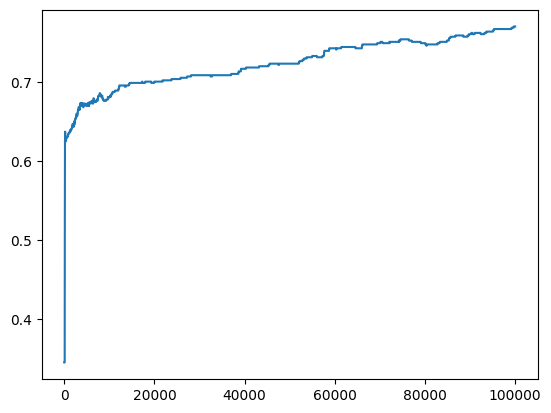

In [595]:
model2.plot()

<div dir="rtl">

#### ۳. آموزش و ارزیابی مدل

</div>

In [ ]:
# TODO: Calculate and display the confusion matrix.
def confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray) -> pd.DataFrame:
    """
    Calculate the confusion matrix for binary classification (classes 0 and 1) 
    and return it as a Pandas DataFrame.
    
    
    """
    confusion_matrix = np.zeros(shape=(2, 2))
    for true, pred in zip(y_true, y_pred):
        confusion_matrix[true, pred] += 1
    return pd.DataFrame(confusion_matrix)


In [597]:
confusion_matrix(y_test, y_pred), accuracy(y_test, y_pred)

(      0     1
 0  88.0   9.0
 1  27.0  29.0,
 np.float64(0.7647058823529411))

In [598]:
from sklearn.linear_model import LogisticRegression
models = LogisticRegression()
models.fit(X_train, y_train)
accuracy(y_test, models.predict(X_test))

np.float64(0.7647058823529411)

In [599]:
models.coef_, model2.weights

(array([[ 0.3426225 ,  1.07066271, -0.23421394, -0.07162636, -0.10557953,
          0.80075504,  0.33447862,  0.19526947]]),
 array([ 0.35822984,  0.70924552, -0.3940914 , -0.0513135 , -0.01215407,
         0.3567315 ,  0.19648645,  0.01151333]))

In [600]:
print(accuracy(y_test, model2.predict(X_test)) == accuracy(y_test, models.predict(X_test)))
print(accuracy(y_test, model2.predict(X_test)))
print(type(model2), type(models))
print(f"{model2.weights}, \n{ models.coef_}")

True
0.7647058823529411
<class '__main__.LogisticRegression'> <class 'sklearn.linear_model._logistic.LogisticRegression'>
[ 0.35822984  0.70924552 -0.3940914  -0.0513135  -0.01215407  0.3567315
  0.19648645  0.01151333], 
[[ 0.3426225   1.07066271 -0.23421394 -0.07162636 -0.10557953  0.80075504
   0.33447862  0.19526947]]


<div dir="rtl">

## بخش سوم: مقایسه پرسپترون و رگرسیون لجستیک

1.  **خروجی الگوریتم:**
    * **پرسپترون:** خروجی یک برچسب قطعی است (مثلاً ۱ یا -۱).
    * **رگرسیون لجستیک:** خروجی یک احتمال بین ۰ و ۱ است که نشان‌دهنده احتمال تعلق نمونه به کلاس مثبت است. این ویژگی آن را برای کارهایی که نیاز به اطمینان از پیش‌بینی داریم، مفیدتر می‌کند.

2.  **تابع هزینه و به‌روزرسانی:**
    * **پرسپترون:** وزن‌ها را فقط برای نمونه‌های اشتباه طبقه‌بندی شده به‌روز می‌کند.
    * **رگرسیون لجستیک:** از تابع هزینه Log Loss استفاده می‌کند و وزن‌ها را بر اساس خطای تمام نمونه‌ها (با وزن‌های مختلف) به‌روز می‌کند. این باعث می‌شود که نسبت به داده‌های پرت مقاوم‌تر باشد و مرز تصمیم بهتری پیدا کند.

3.  **مرز تصمیم:**
    * هر دو الگوریتم مرزهای تصمیم خطی ایجاد می‌کنند.
    * **پرسپترون:** هر خطی که داده‌ها را جدا کند، می‌تواند به عنوان جواب در نظر گرفته شود.
    * **رگرسیون لجستیک:** به دنبال بهترین خطی است که احتمال داده‌ها را بیشینه کند و معمولاً حاشیه امنیت بیشتری ایجاد می‌کند.

4.  **همگرایی:**
    * **پرسپترون:** فقط در صورتی که داده‌ها خطی تفکیک‌پذیر باشند، همگرا می‌شود.
    * **رگرسیون لجستیک:** همیشه به یک جواب بهینه همگرا می‌شود، حتی اگر داده‌ها خطی تفکیک‌پذیر نباشند، زیرا تابع هزینه آن محدب (convex) است.

</div>

In [2]:
import numpy as np
a = np.array([00, 200, -100, -50, 54])
-(a > 5).astype(int)

array([ 0, -1,  0,  0, -1])